In [1]:
from document_pipeline import DocumentPipeline

pipeline = DocumentPipeline()

In [2]:
pipeline.load("storage/run1")

In [3]:
pipeline.graph.graph.vs

In [4]:
vertex = pipeline.graph.graph.vs.find(name='ARCHITECTURE DUELING NETWORK ARCHITECTURE')

In [5]:
import leidenalg
import igraph as ig

In [6]:
partition = leidenalg.find_partition(pipeline.graph.graph, leidenalg.ModularityVertexPartition)

In [7]:
from igraph import Graph


communities: list[Graph] = partition.subgraphs()

In [8]:
from graphs.graph_utils import create_outside_connections


create_outside_connections(communities[0], partition)

Node GAME ATARI 2600 stays within its community 4
Node ARCHITECTURE DUELING NETWORK stays within its community 4
Node ALGORITHM DEEP Q-NETWORKS stays within its community 4
Node TECHNOLOGY SALIENT MAPS stays within its community 4
Node METHODOLOGY JACOBIANS stays within its community 4
Node TECHNOLOGY Q-FUNCTION stays within its community 4
Node ALGORITHM DDQN can leave community 4 via edges: [{'edge': 10, 'to_community': 0, 'to_node': 8}, {'edge': 12, 'to_community': 0, 'to_node': 10}]
Node ALGORITHM SARSA stays within its community 4
Node PERSON VAN HASSELT ET AL. (2015) can leave community 0 via edges: [{'edge': 10, 'to_community': 4, 'to_node': 6}]
Node ALGORITHM NATURE DQN stays within its community 0
Node ENVIRONMENT ALE can leave community 0 via edges: [{'edge': 12, 'to_community': 4, 'to_node': 6}]


{}

In [34]:
from igraph import Vertex

In [29]:
for vertex in communities[0].vs:
    print(vertex)

igraph.Vertex(<igraph.Graph object at 0x00000145C9F55150>, 0, {'entity_name': 'ATARI 2600', 'type': 'GAME', 'descriptions': ['Atari 2600 is a classic video game console used as a benchmark for testing reinforcement learning algorithms.', 'Atari 2600 is a classic video game console that serves as a testbed for reinforcement learning algorithms, where agents learn to play various games.'], 'desc': 'Atari 2600 is a classic video game console that serves as a benchmark and testbed for reinforcement learning algorithms, allowing agents to learn to play various games.', 'name': 'GAME ATARI 2600', 'color': 'red'})
igraph.Vertex(<igraph.Graph object at 0x00000145C9F55150>, 1, {'entity_name': 'DUELING NETWORK', 'type': 'ARCHITECTURE', 'descriptions': ['The dueling network is a deep learning architecture that separates the estimation of state value and advantage functions, improving learning efficiency in reinforcement learning tasks.', 'The Dueling Network architecture is a deep reinforcement l

In [18]:
partition.crossing()

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

Membership of vertices: [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 7, 7, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 8, 8, 3, 3, 3]


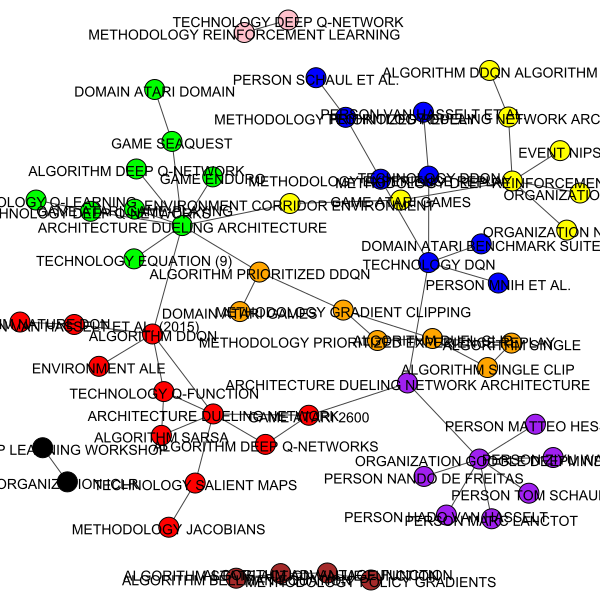

In [14]:
# Step 3: Extract and analyze the communities
# Print the membership of each vertex
print(f"Membership of vertices: {partition.membership}")

# Step 4: (Optional) Visualize the graph with communities
# Assign a color to each vertex based on its community
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'brown', 'pink', "black"]
pipeline.graph.graph.vs['color'] = [colors[partition.membership[i]] for i in range(len(partition.membership))]

# Plot the graph
layout = pipeline.graph.graph.layout("fr")
ig.plot(pipeline.graph.graph, layout=layout, vertex_label=pipeline.graph.graph.vs["name"], vertex_color=pipeline.graph.graph.vs["color"])

In [10]:
from igraph import cluster_leiden

cluster_leiden(
  pipeline.graph.graph,
  objective_function = ("CPM", "modularity"),
  weights = None,
  resolution_parameter = 1,
  beta = 0.01,
  initial_membership = None,
  n_iterations = 2,
  vertex_weights = None
)

ImportError: cannot import name 'cluster_leiden' from 'igraph' (c:\Users\leonj\miniconda3\envs\generate-dialog\Lib\site-packages\igraph\__init__.py)